In [12]:
conda upgrade notebook

Solving environment: ...working... 

Updating notebook is constricted by 

anaconda -> requires notebook==6.4.5=py39haa95532_0

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

## Package Plan ##

  environment location: C:\Users\asank\anaconda3

  added / updated specs:
    - notebook


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-package-handling-1.8.1|   py39h8cc25b3_0         729 KB
    ------------------------------------------------------------
                                           Total:         729 KB

The following packages will be REMOVED:

  xmltodict-0.12.0-pyhd3eb1b0_0

The following packages will be UPDATED:

  conda-package-han~                   1.7.3-py39h8cc25b3_1 --> 1.8.1-py39h8cc25b3_0




conda-package-handli | 729 KB    

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'

df_can = pd.read_excel(
    URL,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
print(df_can.shape)

(195, 43)


In [5]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
#df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)...original code
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
#df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)...original code
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
#df_can.columns = list(map(str, df_can.columns))...original code
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
#df_can.set_index('Country', inplace=True)...original code
df_can.set_index('Country', inplace=True)

# add total column
#df_can['Total'] = df_can.sum(axis=1)...original code
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
#years = list(map(str, range(1980, 2014)))...original code
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


C:\Users\asank\AppData\Local\Temp/ipykernel_28080/2644588630.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [19]:
#-----------Visualizing Data using Matplotlib-------------

#%matplotlib inline.....original code
%matplotlib inline

#import matplotlib as mpl.....original code
#import matplotlib.pyplot as plt.....original code
import matplotlib as mpl
import matplotlib.pyplot as plt

#mpl.style.use('ggplot') # optional: for ggplot-like style.....original code
mpl.style.use('ggplot')

# check for latest version of Matplotlib
#print('Matplotlib version: ', mpl.__version__) # >= 2.0.0.....original code
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.5.2


In [20]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [21]:
# group countries by continents and apply sum() function 
#df_continents = df_can.groupby('Continent', axis=0).sum()...original code
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
#print(type(df_can.groupby('Continent', axis=0)))...original code
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


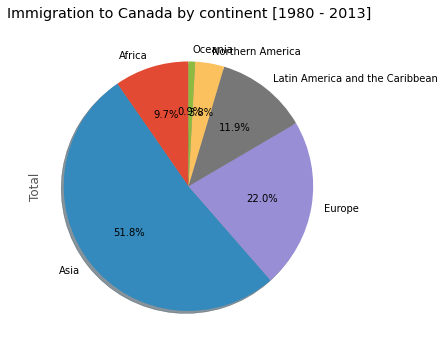

In [23]:
#--------Pie Charts----------

# autopct create %, start angle represent starting point
#df_continents['Total'].plot(kind='pie',
                           # figsize=(5, 6),
                           # autopct='%1.1f%%', # add in percentages
                           # startangle=90,     # start angle 90° (Africa)
                           # shadow=True,       # add shadow      
                           # )

#plt.title('Immigration to Canada by Continent [1980 - 2013]')
#plt.axis('equal') # Sets the pie chart to look like a circle.

#plt.show()

df_continents['Total'].plot(kind='pie',
                           figsize=(5,6),
                           autopct='%1.1f%%', # add in percentages
                           startangle=90, # start angle 90° (Africa)
                           shadow=True, # add shadow
                           )
plt.title('Immigration to Canada by continent [1980 - 2013]')
plt.axis('equal') #Sets the pie chart to look like a circle.
plt.show()

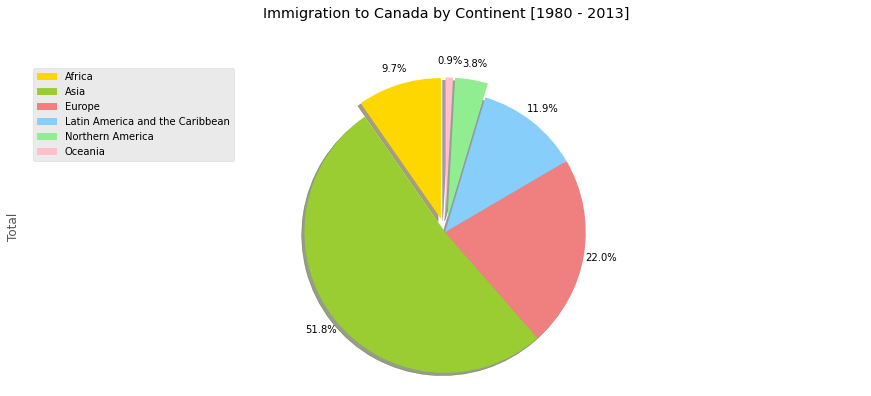

In [24]:
#--------clear the pie-chart for more visibility-------

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

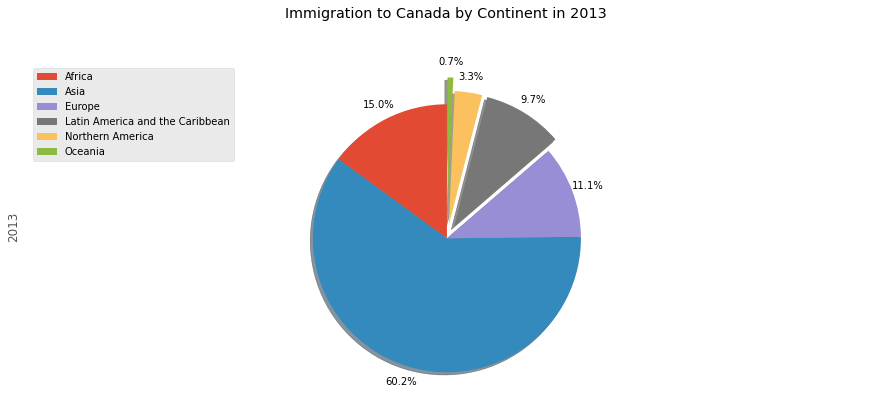

In [29]:
#Question: Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

#Note: You might need to play with the explore values in order to fix any overlapping slice values.

explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 continents
                            )

 # scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

 # show plot
plt.show()

In [38]:
#------Box Plots--------Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose() #take the transpose for make it meaningful visualization
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


In [39]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


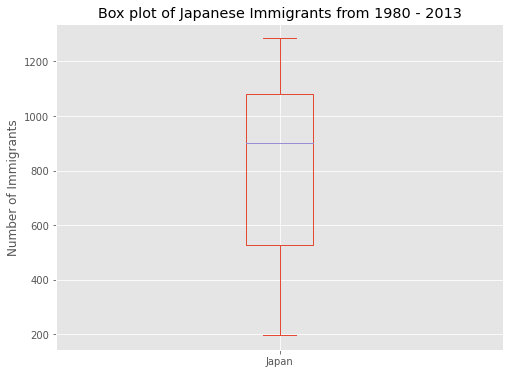

In [40]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [44]:
#Question: Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.
#Step 1: Get the dataset for China and India and call the dataframe df_CI.

df_CI= df_can.loc[['China', 'India', 'Sri Lanka'], years].transpose()
df_CI.head()

Country,China,India,Sri Lanka
1980,5123,8880,185
1981,6682,8670,371
1982,3308,8147,290
1983,1863,7338,197
1984,1527,5704,1086


In [45]:
df_CI.describe()

Country,China,India,Sri Lanka
count,34.000000,34.000000,34.000000
mean,19410.647059,20350.117647,4363.470588
std,13568.230790,10007.342579,2844.264566
min,1527.000000,4211.000000,185.000000
25%,5512.750000,10637.750000,2763.250000
50%,19945.000000,20235.000000,4471.000000
75%,31568.500000,28699.500000,5381.000000
max,42584.000000,36210.000000,13102.000000


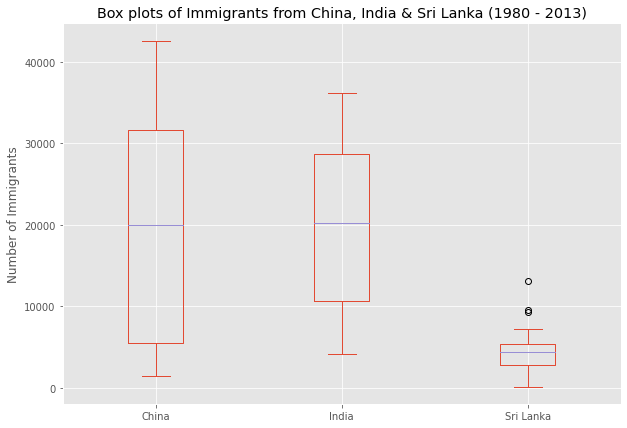

In [46]:
# Step 2 - Plot the data using boxplot

df_CI.plot(kind='box', figsize=(10, 7))

plt.title('Box plots of Immigrants from China, India & Sri Lanka (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

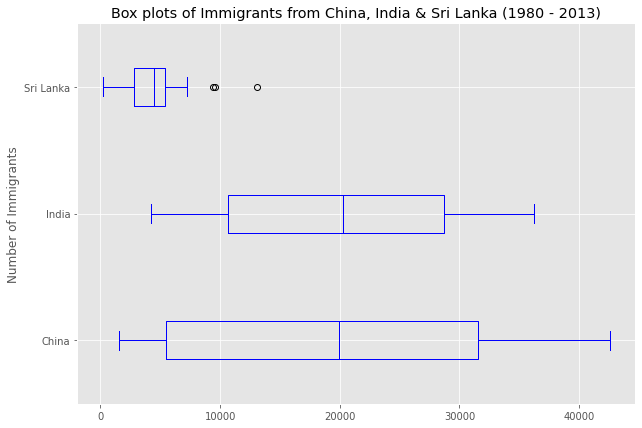

In [57]:
#Vertical boxplots

df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China, India & Sri Lanka (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

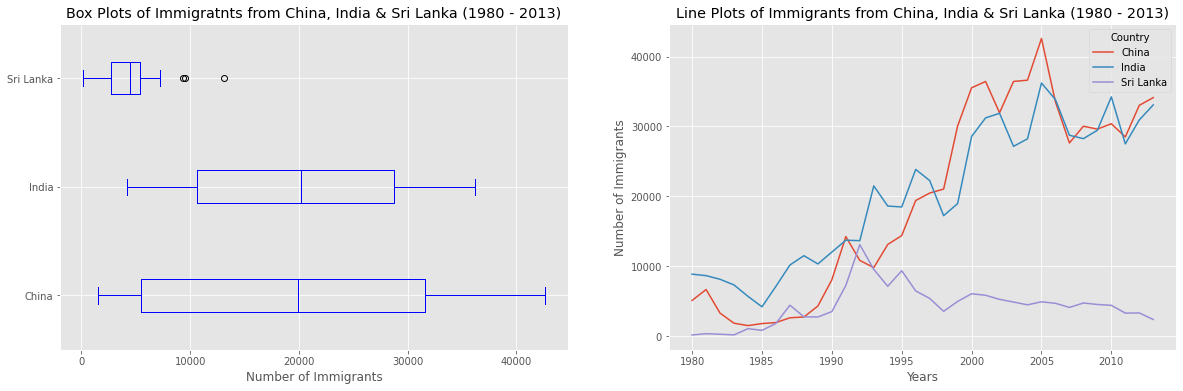

In [58]:
#----Subplots-----(multiple plots within the same figure)

fig = plt.figure() # create figure
ax0 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1,2,2) # add subplot 2 (1 row, 2 coulmns, second plot)

#Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20,6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigratnts from China, India & Sri Lanka (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax1.set_xlabel('Countries')

#Subplot 2:Line plot
df_CI.plot(kind='line', figsize=(20,6), ax=ax1) #add to subplot 2
ax1.set_title('Line Plots of Immigrants from China, India & Sri Lanka (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [66]:
# Question: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

# Step 1: Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe df_top15.

df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [67]:
# Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:

#1.  Create a list of all years in decades 80's, 90's, and 00's.
#2.  Slice the original dataframe df_top15 to create a series for each decade and sum across all years for each country.
#3.  Merge the three series into a new data frame. Call your dataframe **new_df**.

# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1)
df_90s = df_top15.loc[:, years_90s].sum(axis=1)
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s' : df_80s, '1990s' : df_90s, '2000s' : df_00s})
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [68]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


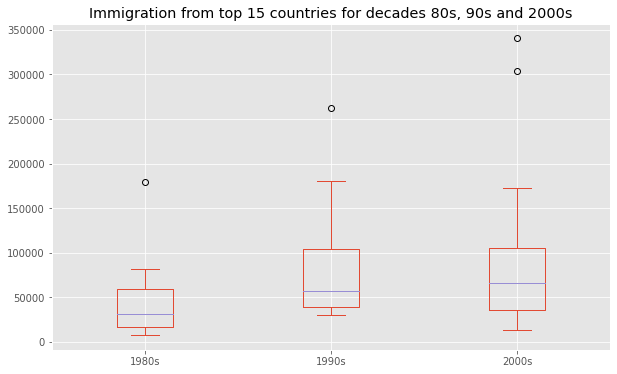

In [70]:
# Step 3: Plot the box plots.

new_df.plot(kind='box', figsize=(10, 6))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

In [71]:
# Outlier > 105,505.5 + (1.5 * 69,404)
# Outlier > 209,611.5

# let's check how many entries fall above the outlier threshold

new_df=new_df.reset_index() # reset to default index
new_df[new_df['2000s']> 209611.5] # taking decade 2000 as an example

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


In [72]:
#------Scatter Plots------

# Using a scatter plot, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

# Step 1: Get the dataset. Since we are expecting to use the relationship betewen years and total population, we will convert years to int type.

# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


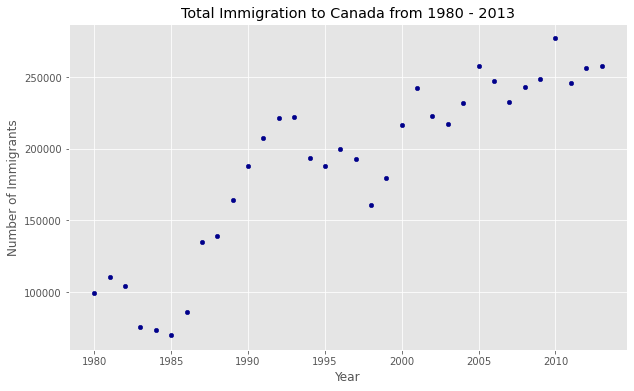

In [74]:
# Step 2: Plot the data

df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [85]:
# So let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

# Step 1: Get the equation of line of best fit. We will use Numpy's polyfit() method by passing in the following:

# x: x-coordinates of the data.
# y: y-coordinates of the data.
# deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

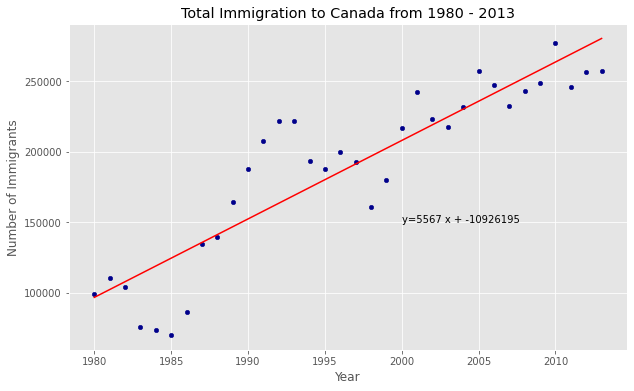

'No. Immigrants = 5567 * Year + -10926195'

In [86]:
# Step 2: Plot the regression line on the scatter plot

df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

In [87]:
# Question: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

# Step 1: Get the data:

#Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it df_countries.
#Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe df_total.
#Reset the index in place.
#Rename the columns to year and total.
#Display the resulting dataframe.

# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1)) # after transposing its now a column operation. so axis = 1

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# show resulting dataframe
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


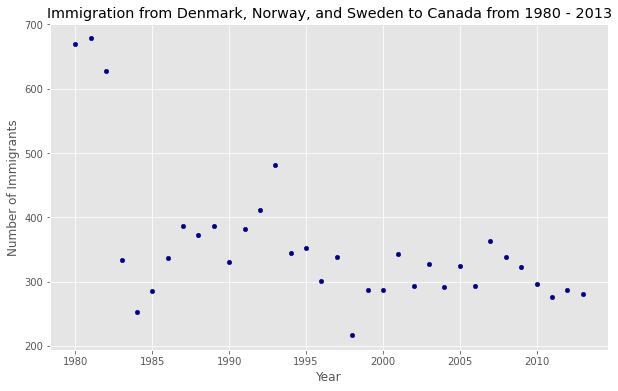

In [89]:
# generate scatter plot
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# show plot
plt.show()

In [91]:
#------Bubble Plots-----
#Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the normalized value of the population for each year.

#Step 1: Get the data for Brazil and Argentina. Like in the previous example, we will convert the Years to type int and include it in the dataframe.


# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()




Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [93]:
# Step 2: Create the normalized weights. (Refer to note for the formula)

# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min())/(df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())


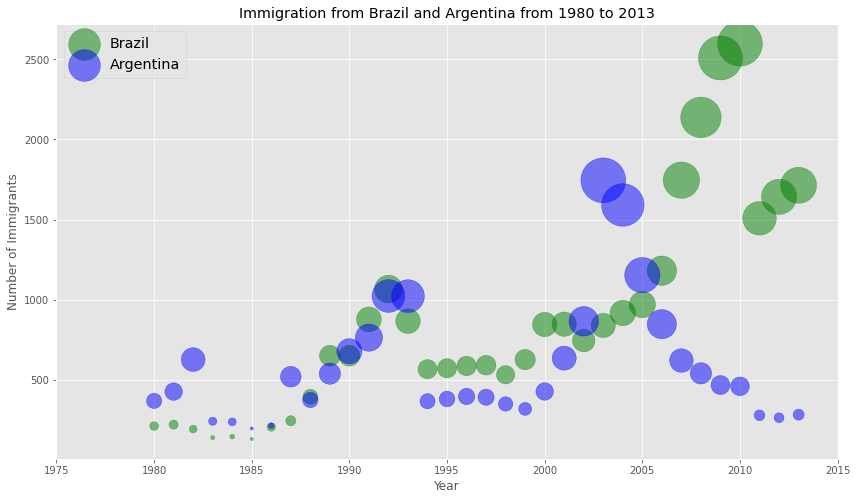

In [100]:
# Step 3: Plot the data (On the same diagram)

# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0 # To plot on the same diagram
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

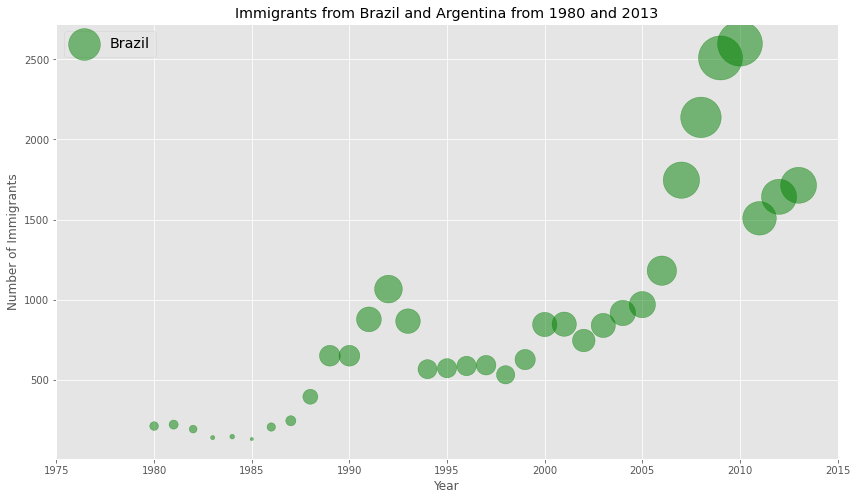

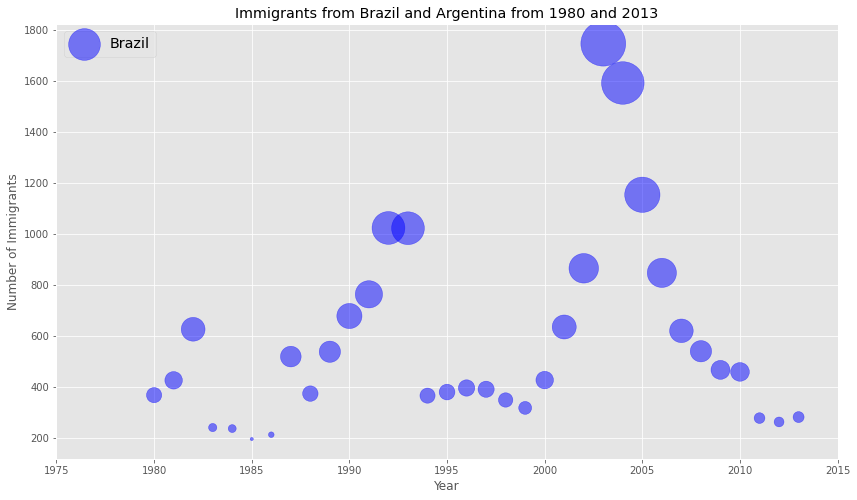

In [102]:
# To Plot the data separately


# Brazil
ax0 = df_can_t.plot(kind='scatter',
                   x='Year',
                   y='Brazil',
                   figsize=(14, 8),
                   alpha=0.5, # Transparency
                   color='green',
                   s=norm_brazil * 2000 + 10, # Pass in weights
                   xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                   x='Year',
                   y='Argentina',
                   figsize=(14, 8),
                   alpha=0.5, # Transparency
                   color='blue',
                   s=norm_argentina * 2000 + 10, # Pass in weights
                   xlim=(1975, 2015)
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigrants from Brazil and Argentina from 1980 and 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

ax1.set_ylabel('Number of Immigrants')
ax1.set_title('Immigrants from Brazil and Argentina from 1980 and 2013')
ax1.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

Question: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use df_can_t that we defined and used in the previous example.

In [105]:
# Step 1: Normalize the data pertaining to China and India.

# normalize China data
norm_china = (df_can_t['China'] - df_can_t['China'].min())/(df_can_t['China'].max() - df_can_t['China'].min())

# normalize India data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

# normalize Sri Lanka data
norm_SriLanka = (df_can_t['Sri Lanka'] - df_can_t['Sri Lanka'].min()) / (df_can_t['Sri Lanka'].max() - df_can_t['Sri Lanka'].min())


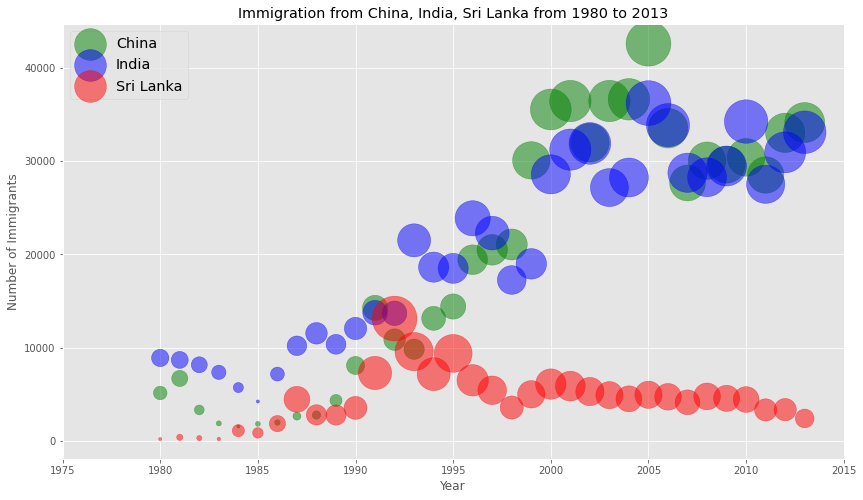

In [123]:
# Step 2: Generate the bubble plot

# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax=ax0 # To plot on the same diagram
                    )

# Sri Lanka
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Sri Lanka',
                    alpha=0.5,
                    color="red",
                    s=norm_SriLanka * 2000 + 10,
                    ax=ax0 # To plot on the same diagram
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China, India, Sri Lanka from 1980 to 2013')
ax0.legend(['China', 'India', 'Sri Lanka'], loc='upper left', fontsize='x-large')